# 16.2 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1

**This file contains Sections 16.2 and 16.3 and all of their subsections and Self Check exercises**

### Classification Problems
### Our Approach

![Self Check Exercises check mark image](files/art/check.png)
## 16.2 Self Check

**1. _(Fill-In)_** `________` classification divides samples into two distinct classes, and `________`-classification divides samples into many distinct classes.

**Answer:** binary, multi. 

## 16.2.1 k-Nearest Neighbors Algorithm
### Hyperparameters and Hyperparameter Tuning

![Self Check Exercises check mark image](files/art/check.png)
## 16.2.1 Self Check
**1. _(True/False)_** In machine learning, a model implements a machine-learning algorithm. In scikit-learn, models are called estimators.

**Answer:** True.

**2. _(Fill-In)_** The process of choosing the best value of *k* for the k-nearest neighbors algorithm is called `________`

**Answer:** hyperparameter tuning.

## 16.2.2 Loading the Dataset

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

### Displaying the Description

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Checking the Sample and Target Sizes

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

### A Sample Digit Image

In [7]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

### Preparing the Data for Use with Scikit-Learn

In [8]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

![Self Check Exercises check mark image](files/art/check.png)
## 16.2.2 Self Check

**1. _(Fill-In)_** A `Bunch` object’s  `________` and `________` attributes are NumPy arrays containing the dataset’s samples and labels, respectively.

**Answer:**  `data`, `target`.

**2. _(True/False)_** A scikit-learn `Bunch` object contains only a dataset’s data.

**Answer:** False. A scikit-learn `Bunch` object contains a dataset’s data and information about the dataset (called metadata), available through the `DESCR` attribute.

**3. _(IPython Session)_** For sample number `22` in the Digits dataset, display the 8-by-8 image data and numeric value of the digit the image represents.

**Answer:** 

In [9]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [10]:
digits.target[22]

2

## 16.2.3 Visualizing the Data
### Creating the Diagram 

In [11]:
import matplotlib.pyplot as plt

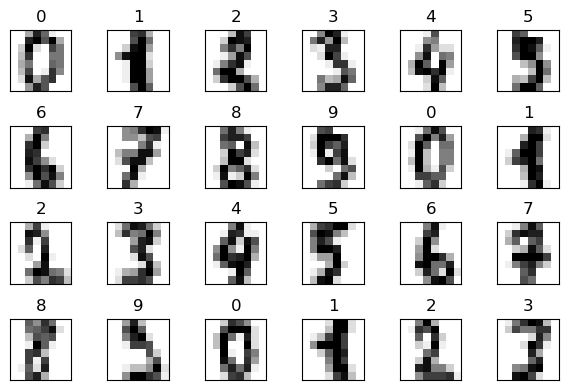

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

### Displaying Each Image and Removing the Axes Labels 

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()     

In [13]:
# This placeholder cell was added because we had to combine 
# the sections snippets 12-13 for the visualization to work in Jupyter
# and want the subsequent snippet numbers to match the book

![Self Check Exercises check mark image](files/art/check.png)
## 16.2.3 Self Check
**1. _(Fill-In)_** The process of familiarizing yourself with your data is called `________`.

**Answer:**  data exploration.

**2. _(IPython Session)_** Display the image for sample number `22` of the Digits dataset. 

**Answer:** 

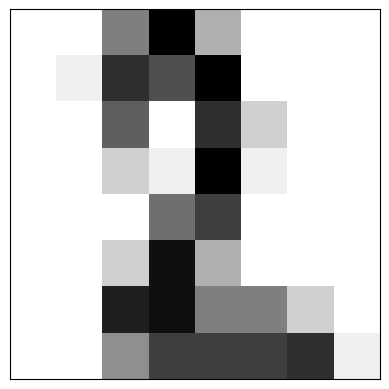

In [14]:
axes = plt.subplot()

image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

xticks = axes.set_xticks([])

yticks = axes.set_yticks([])

In [15]:
# placeholder due to merge of prior cells

In [16]:
# placeholder due to merge of prior cells

In [17]:
# placeholder due to merge of prior cells

## 16.2.4 Splitting the Data for Training and Testing 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

### Training and Testing Set Sizes

In [20]:
X_train.shape

(1347, 64)

In [26]:
X_test.shape

(450, 64)

![Self Check Exercises check mark image](files/art/check.png)
## 16.2.4 Self Check
**1. _(True/False)_** You should typically use all of a dataset’s data to train a model.

**Answer:** False. It’s important to set aside a portion of your data for testing, so you can evaluate a model’s performance using data that the model has not yet seen. 

**2. _(Discussion)_** For the Digits dataset, what numbers of samples would the following statement reserve for training and testing purposes? 

```python
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.40)
```
**Answer:** 1078 and 719.

## 16.2.5 Creating the Model 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()

## 16.2.6 Training the Model 

In [29]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

![Self Check Exercises check mark image](files/art/check.png)
## 16.2.6 Self Check
**1. _(Fill-In)_** The `KNeighborsClassifier` is said to be `________` because its work is performed only when you use it to make predictions.

**Answer:** lazy.

**2. _(True/False)_** Each scikit-learn estimator’s `fit` method simply loads a dataset.

**Answer:** False. For most, scikit-learn estimators, the `fit` method loads the data into the estimator then uses that data to perform complex calculations behind the scenes that learn from the data and train the model. 

## 16.2.7 Predicting Digit Classes 

In [30]:
predicted = knn.predict(X=X_test)

In [37]:
predicted

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 8, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 4, 7, 2, 0, 3, 7, 8, 8, 7, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 7, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 2, 5, 3,

In [38]:
expected = y_test

In [39]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [40]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [41]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [42]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

![Self Check Exercises check mark image](files/art/check.png)
## 16.2.7 Self Check
**1. _(IPython Session)_** Using the `predicted` and `expected` arrays, calculate and display the prediction accuracy percentage.

**Answer:** 

In [43]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

97.78%


**2. _(IPython Session)_** Rewrite the list comprehension in snippet `[29]` using a for loop. Which coding style do you prefer?

**Answer:** 

In [44]:
wrong = []

In [45]:
for p, e in zip(predicted, expected):
      if p != e:
          wrong.append((p, e))

In [46]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

# 16.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2
## 16.3.1 Metrics for Model Accuracy 
### Estimator Method `score`

In [47]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


### Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [50]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

### Classification Report

In [51]:
from sklearn.metrics import classification_report

In [52]:
names = [str(digit) for digit in digits.target_names]

In [53]:
print(classification_report(expected, predicted, 
       target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Visualizing the Confusion Matrix

In [54]:
import pandas as pd

In [55]:
confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))

In [56]:
import seaborn as sns

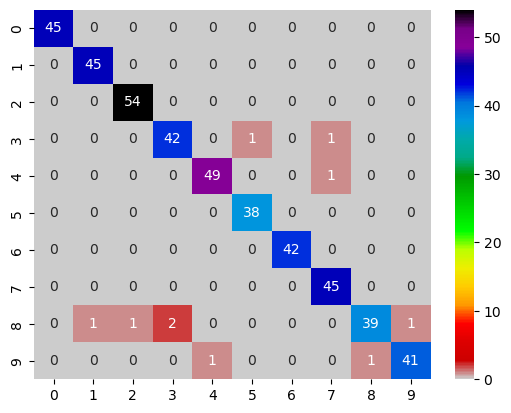

In [57]:
axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

![Self Check Exercises check mark image](files/art/check.png)
## 16.3.1 Self Check
**1. _(Fill-In)_** A Seaborn `________` displays values as colors, often with values of higher magnitude displayed as more intense colors.

**Answer:** heat map.

**2. _(True/False)_** In a classification report, the precision specifies the total number of correct predictions for a class divided by the total number of samples for that class. 

**Answer:** True.

**3. _(Discussion)_** Explain row 3 of the confusion matrix presented in this section:

```
[ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0]
```
**Answer:** The number `42` in column index 3 indicates that 42 `3`s were correctly predicted as 3s. The number `1` at column indices 5 and 7 indicates that one `3` was incorrectly classified as a `5` and one was incorrectly classified as a `7`. 

## 16.3.2 K-Fold Cross-Validation
### KFold Class

In [58]:
from sklearn.model_selection import KFold

In [59]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Using the `KFold` Object with Function `cross_val_score` 

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
scores = cross_val_score(estimator=knn, X=digits.data, 
     y=digits.target, cv=kfold)

In [62]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [63]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [64]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


![Self Check Exercises check mark image](files/art/check.png)
## 16.3.2 Self Check
**1.  _(True/False)_** Randomizing the data by shuffling it before splitting it into folds is particularly important if the samples might be ordered or grouped. 

**Answer:** True.

**2. _(True/False)_** When you call `cross_val_score` to peform k-fold cross-validation, the function returns the best score produced while testing the model with each fold.

**Answer:** False. The function returns an array containing the scores for each fold. The mean of those scores is the estimator’s overall score. 

## 16.3.3 Running Multiple Models to Find the Best One 

In [65]:
from sklearn.svm import SVC

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()}

In [68]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


### Scikit-Learn Estimator Diagram

![Self Check Exercises check mark image](files/art/check.png)
## 16.3.3 Self Check
**1. _(True/False)_** You should choose the best estimator before performing your machine learning study.

**Answer:** False. It’s difficult to know in advance which machine learning model(s) will perform best for a given dataset, especially when they hide the details of how they operate from their users. For this reason, you should run multiple models to determine which is the best for your study. 

**2. _(Discussion)_** How would you modify the code in this section to so that it would also test a `LinearSVC` estimator?

**Answer:** You’d import the `LinearSVC` class, add a key–value pair to the `estimators` dictionary (`'LinearSVC': LinearSVC()`), then execute the `for` loop, which tests every estimator in the dictionary.

## 16.3.4 Hyperparameter Tuning 

In [69]:
for k in range(1, 20, 2):
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(estimator=knn, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


![Self Check Exercises check mark image](files/art/check.png)
## 16.3.4 Self Check
**1. _(True/False)_** When you create an estimator object, the default hyperparameter values that scikit-learn uses are generally the best ones for every machine learning study. 

**Answer:** False. The default hyperparameter values make it easy for you to test estimators quickly. In real-world machine learning studies, you’ll want to use hyperparameter tuning to choose hyperparameter values that produce the best possible predictions.

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
